In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns

In [12]:
df = pd.read_csv("movies.csv")

print(f'Has nulls? {df.isnull().sum().sum()}')
print(f'Has NA? {df.isna().sum().sum()}')
df.head()

Has nulls? 0
Has NA? 0


,Movie ID,Genre,IMDb Rating,Total Reviews,Box Office Revenue (Million $)
0,M001,Action,7.5,15230,220.5
1,M002,Comedy,6.8,10320,120.8
2,M003,Drama,8.2,18950,95.4
3,M004,Horror,5.9,7430,48.2
4,M005,Sci-Fi,8.5,21030,310.2


In [24]:
k_max = 10
wsse_res = []
k_s = []

X = df[["IMDb Rating", "Total Reviews", "Box Office Revenue (Million $)"]]

for k in range(1, k_max):
  model = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X)
  # intertia_ == MSE of the KMeans
  wsse_res.append(model.inertia_)
  k_s.append(k)

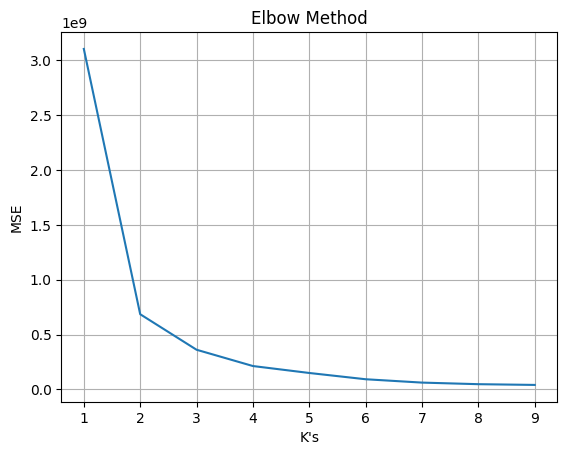

In [25]:
plt.plot(k_s, wsse_res)
plt.xlabel("K's")
plt.ylabel("MSE")
plt.title("Elbow Method")
plt.grid()
plt.show()

In [44]:
# we pick 4 (although 3 is also a good choice) - this seems to be the 'k' for which we stop having big drops of MSE so its a good one to have
df["Cluster"] = KMeans(n_clusters=4, random_state=0, n_init="auto").fit_predict(X)
df.head()

,Movie ID,Genre,IMDb Rating,Total Reviews,Box Office Revenue (Million $),Cluster
0,M001,Action,7.5,15230,220.5,0
1,M002,Comedy,6.8,10320,120.8,1
2,M003,Drama,8.2,18950,95.4,3
3,M004,Horror,5.9,7430,48.2,1
4,M005,Sci-Fi,8.5,21030,310.2,3


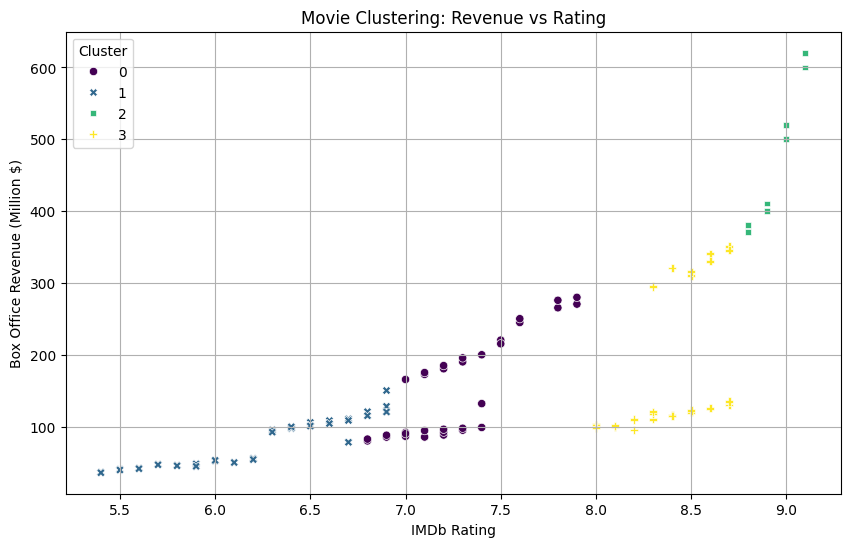

In [45]:
# plotting all using sns + matplotlib
plt.figure(figsize=(10, 6))
sns.scatterplot(
 x=df["IMDb Rating"],
 y=df["Box Office Revenue (Million $)" ],
 hue=df["Cluster"],
 palette="viridis",
 style=df["Cluster"],
 markers=True
)
plt.xlabel("IMDb Rating")
plt.ylabel("Box Office Revenue (Million $)")
plt.title("Movie Clustering: Revenue vs Rating")
plt.grid()
plt.show()